In [18]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf



     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.5 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 57.5/57.5 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     -------------- ------------------------- 0.5/1.5 MB 16.6 MB/s eta 0:00:01
     ------------------- -------------------- 0.7/1.5 MB 11.1 MB/s eta 0:00:01
     ----------------------- ---------------- 0.9/1.5 MB 7.8 MB/s eta 0:00:01
     ----------------------- ---------------- 0.9/1.5 MB 7.8 MB/s eta 0:00:01
     ----------------------- ---------------- 0.9/1.5 MB 7.8 MB/s eta 0:00:01
     ------------------------------ --------- 1.1/1.5 MB 4.7 MB/s eta 0:00:01
     ----------------------------------- ---- 1.3/1.5 MB 5.0 MB/s eta 0:00

In [19]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [31]:
data = load_data('MRF.NS')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,6081.000000,6215.000000,6032.0,6142.950195,5973.220703,18735
1,2010-01-05,6200.000000,6269.000000,6150.0,6160.600098,5990.382812,17947
2,2010-01-06,6180.000000,6198.000000,6055.0,6090.399902,5922.122559,10735
3,2010-01-07,6249.899902,6371.000000,6151.0,6216.200195,6044.447266,42206
4,2010-01-08,6243.299805,6294.399902,6150.0,6166.850098,5996.460938,11155


In [32]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,6081.000000,6215.000000,6032.0,6142.950195,18735
1,6200.000000,6269.000000,6150.0,6160.600098,17947
2,6180.000000,6198.000000,6055.0,6090.399902,10735
3,6249.899902,6371.000000,6151.0,6216.200195,42206
4,6243.299805,6294.399902,6150.0,6166.850098,11155


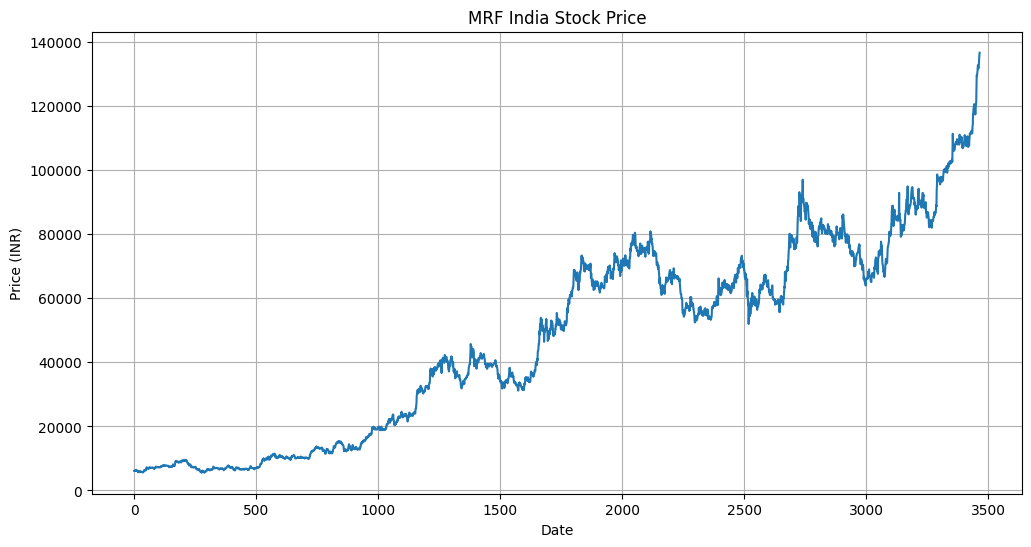

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("MRF India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [34]:
df

,Open,High,Low,Close,Volume
0,6081.000000,6215.000000,6032.000000,6142.950195,18735
1,6200.000000,6269.000000,6150.000000,6160.600098,17947
2,6180.000000,6198.000000,6055.000000,6090.399902,10735
3,6249.899902,6371.000000,6151.000000,6216.200195,42206
4,6243.299805,6294.399902,6150.000000,6166.850098,11155
...,...,...,...,...,...
3461,132099.000000,132199.593750,130210.000000,131828.406250,5915
3462,132459.000000,133625.000000,132002.703125,133368.000000,4736
3463,133868.000000,134639.906250,132661.343750,134351.093750,6940
3464,134699.000000,136799.953125,133650.046875,135951.156250,8379


In [ ]:
Plotting moving averages of 100 day

In [35]:
ma100 = df.Close.rolling(100).mean()
ma100

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
            ...      
3461    112690.598047
3462    112959.641016
3463    113238.422969
3464    113520.331016
3465    113808.293516
Name: Close, Length: 3466, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

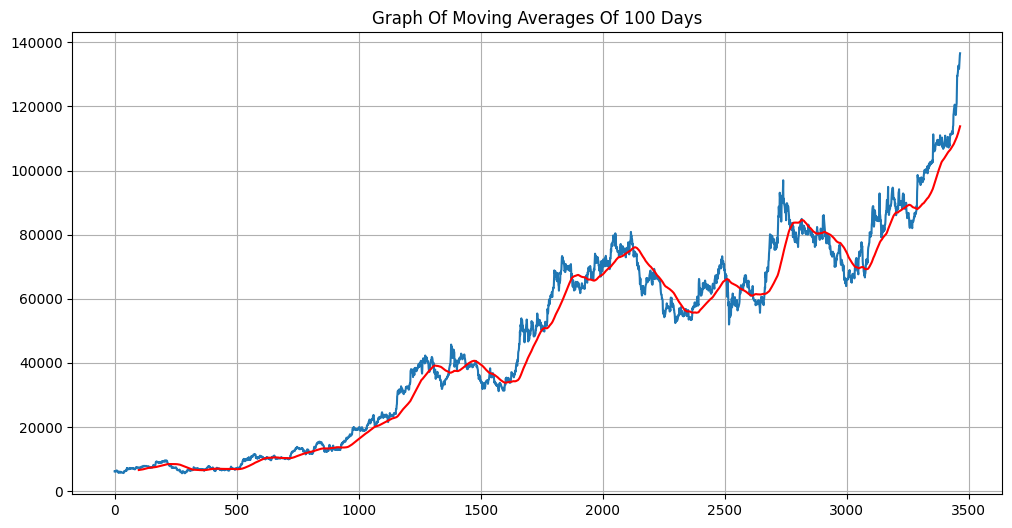

In [36]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [ ]:
Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

In [37]:
ma200 = df.Close.rolling(200).mean()
ma200

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
            ...      
3461    104410.046172
3462    104659.086406
3463    104912.111875
3464    105169.868398
3465    105432.018672
Name: Close, Length: 3466, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

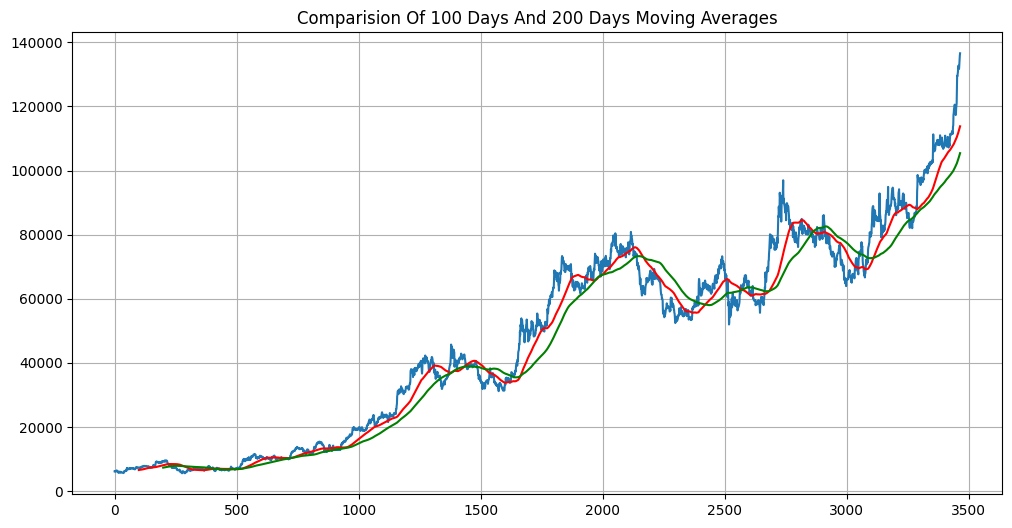

In [38]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [39]:
df.shape

(3466, 5)

In [ ]:
Spliting the dataset into training (70%) and testing (30%) set

In [41]:
train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2426, 7)
(1040, 7)


In [42]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,6081.000000,6215.000000,6032.0,6142.950195,5973.220703,18735
1,2010-01-05,6200.000000,6269.000000,6150.0,6160.600098,5990.382812,17947
2,2010-01-06,6180.000000,6198.000000,6055.0,6090.399902,5922.122559,10735
3,2010-01-07,6249.899902,6371.000000,6151.0,6216.200195,6044.447266,42206
4,2010-01-08,6243.299805,6294.399902,6150.0,6166.850098,5996.460938,11155


In [43]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2426,2019-11-08,63681.398438,65490.00,62855.699219,64454.449219,64069.339844,15991
2427,2019-11-11,64001.000000,64100.00,62950.000000,63085.199219,62708.277344,7175
2428,2019-11-13,63380.000000,63380.00,62400.000000,62959.148438,62582.976562,4688
2429,2019-11-14,63068.800781,63700.00,62785.300781,63621.500000,63241.367188,3395
2430,2019-11-15,63749.050781,64460.25,63312.300781,63950.500000,63568.406250,3201


In [ ]:
Using MinMax scaler for normalization of the dataset

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Assuming 'train' and 'test' DataFrames are defined elsewhere in your code
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

data_training_array = scaler.fit_transform(train_close)
data_training_array


array([[0.00795047],
       [0.00818482],
       [0.00725275],
       ...,
       [0.77422281],
       [0.77132835],
       [0.76979949]])

In [47]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [48]:
x_train.shape

(2326, 100, 1)

In [ ]:
ML Model (LSTM)

In [49]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [50]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
Training the model

In [52]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)


Epoch 1/100

73/73 [==============================] - 27s 221ms/step - loss: 0.0417 - mean_absolute_error: 0.1389
Epoch 2/100
73/73 [==============================] - 16s 220ms/step - loss: 0.0104 - mean_absolute_error: 0.0690
Epoch 3/100
73/73 [==============================] - 16s 223ms/step - loss: 0.0088 - mean_absolute_error: 0.0629
Epoch 4/100
73/73 [==============================] - 17s 231ms/step - loss: 0.0069 - mean_absolute_error: 0.0555
Epoch 5/100
73/73 [==============================] - 16s 221ms/step - loss: 0.0068 - mean_absolute_error: 0.0548
Epoch 6/100
73/73 [==============================] - 15s 211ms/step - loss: 0.0078 - mean_absolute_error: 0.0579
Epoch 7/100
73/73 [==============================] - 16s 223ms/step - loss: 0.0067 - mean_absolute_error: 0.0532
Epoch 8/100
73/73 [==============================] - 18s 246ms/step - loss: 0.0065 - mean_absolute_error: 0.0523
Epoch 9/100
73/73 [==============================] - 17s 230ms/step - loss: 0.0055 - mean_abso

In [53]:
model.save('keras_model.h5')

C:\Users\sarthak agarwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
test_close.shape

(1040, 1)

In [59]:
import pandas as pd

past_100_days = pd.DataFrame(train_close[-100:])
test_df = pd.DataFrame(test_close)

# Concatenate past_100_days and test_df
final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [60]:
final_df.head()

,0
0,55709.500000
1,54770.949219
2,54704.750000
3,54724.699219
4,54619.800781


In [61]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0441864 ],
       [0.03309563],
       [0.03231336],
       ...,
       [0.97348746],
       [0.99239526],
       [1.        ]])

In [62]:
input_data.shape

(1140, 1)

In [ ]:
Testing the model

In [63]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [64]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1040, 100, 1)
(1040,)


In [ ]:
Making prediction and plotting the graph of predicted vs actual values

In [65]:
# Making predictions

y_pred = model.predict(x_test)

33/33 [==============================] - 2s 34ms/step


In [66]:
y_pred.shape

(1040, 1)

In [70]:
y_test

array([0.14752473, 0.13134441, 0.12985488, ..., 0.97348746, 0.99239526,
       1.        ])

In [71]:
y_pred

array([[0.18648371],
       [0.18788087],
       [0.18893214],
       ...,
       [0.8968618 ],
       [0.8982206 ],
       [0.8998025 ]], dtype=float32)

In [72]:
scaler.scale_

array([1.18169154e-05])

In [80]:
scale_factor = 1/1.18169154e-05
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

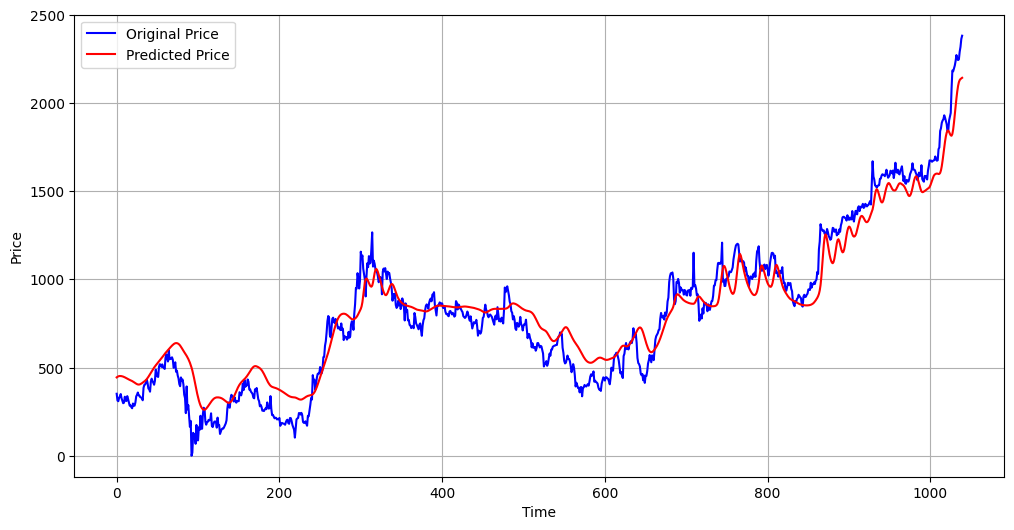

In [77]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Model evaluation

In [ ]:
Calculation of mean absolute error

In [81]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 12.11%


In [ ]:
Calculation of R2 score

In [82]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9273615739894842


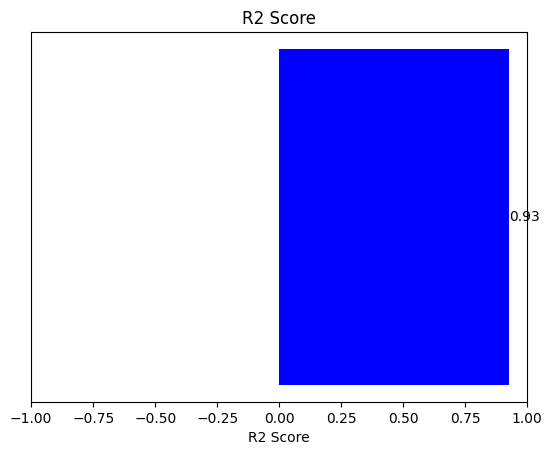

In [85]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='blue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

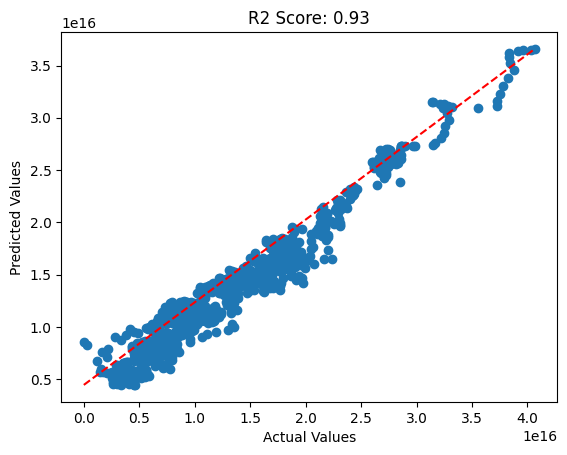

In [87]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()